In [1]:
import math
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import numpy.random as random

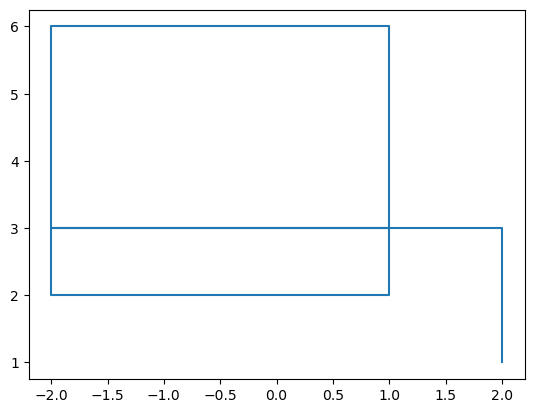

In [2]:
A = [2, -2, 1, -2, 1]
B = [1, 3, 2, 6, 3]
plt.step(A, B)

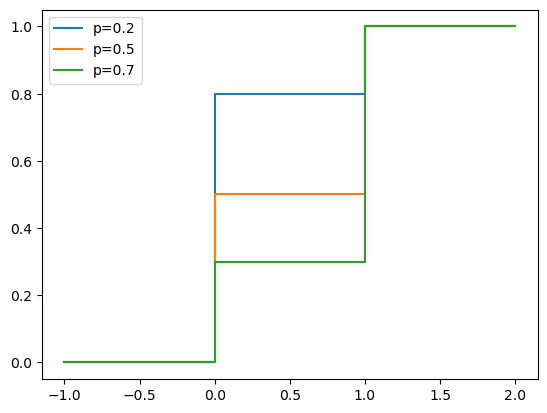

In [3]:
def bernouilli(p):
    plt.step([-1, 0, 1, 1, 2], [0, 0, 1-p, 1, 1], label=f'p={p}')
    plt.legend()
    
for p in [0.2, 0.5, 0.7]:
    bernouilli(p)

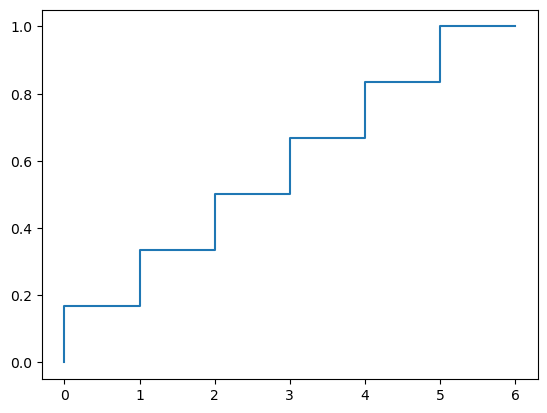

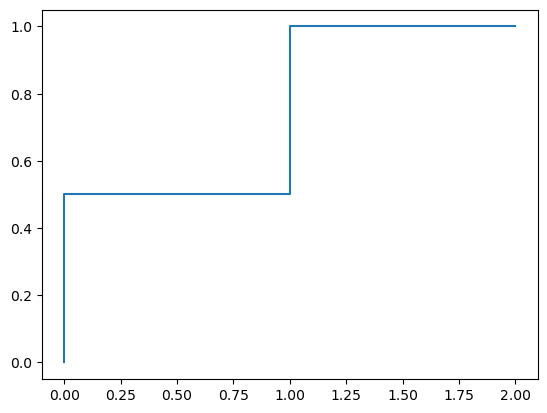

In [4]:
def uniforme_discrete(card):
    plt.figure()
    x = range(0, card +1 )
    y = [0]
    for i in range(1, card +1):
        y.append(i/card)
    plt.step(x, y)
    
uniforme_discrete(6)
uniforme_discrete(2)

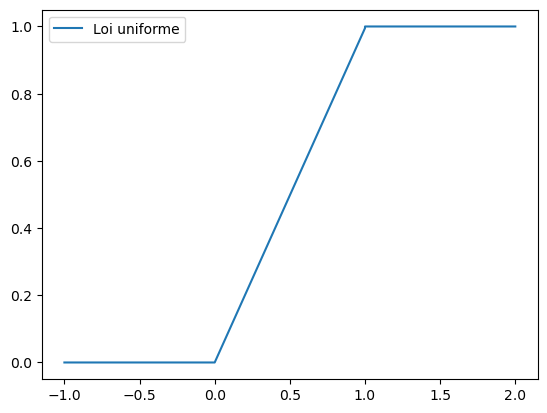

In [5]:
def uniforme(a, b, card):
    x = np.linspace(a, b, card)
    y = np.zeros(card)
    for i in range(card):
        y[i] = i/card
    addANumber = lambda A: np.array([A for i in range(100)])
    x = np.concatenate((np.linspace(-1, 0, 100), x, np.linspace(1, 2, 100)))
    y = np.concatenate((addANumber(0), y, addANumber(1)))
    return x, y
    
Ux, Uy = uniforme(0, 1, 200)
plt.plot(Ux, Uy, label='Loi uniforme')
plt.legend()

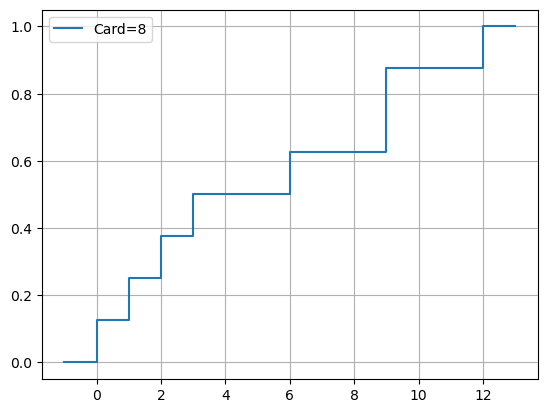

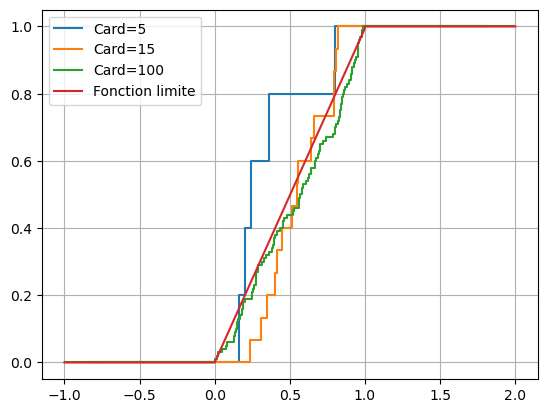

In [6]:
def traceFctRepEmpirique01(ens):
    card = len(ens)
    x = np.concatenate((np.array([min(ens)-1]), ens, np.array([max(ens)+1])))
    x.sort()
    y = [0]
    for i in range(card + 1):
        y.append(i/card)
    plt.step(x, y, label=f"Card={card}")
    plt.legend()
    plt.grid()
    
traceFctRepEmpirique01([0, 1, 9, 6, 3, 12, 2, 9])
plt.figure()
for n in [5, 15, 100]:
    traceFctRepEmpirique01(np.random.rand(n))
x,y = uniforme(0, 1, 200)
plt.plot(x,y, label='Fonction limite')
plt.legend()

Fonction de répartition: 1 - exp(-lambda * x)

Fonction inverse : -1/lambda * ln(1-U)

(0.0, 3.0)

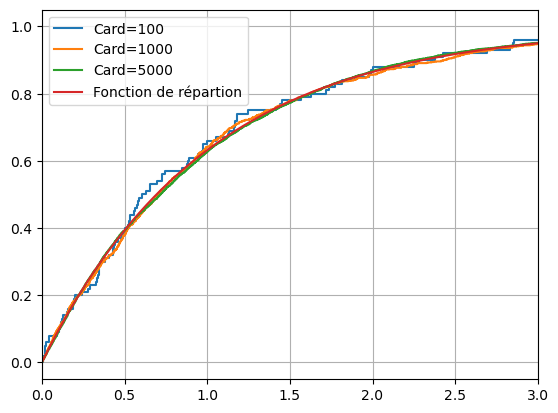

In [28]:
def inverse_F(U, lam):
    return -1/lam * np.log(1-U)

def simuExp():
    return inverse_F(np.random.rand(), lam)

def exponentielle(m):
    return 1-np.exp(-lam * x)

lam = 1
m = math.ceil(-np.log(0.05)/lam)

for n in [100, 1000, 5000]:
    traceFctRepEmpirique01([simuExp() for _ in range(n)])
    
x = np.linspace(0, m, 200)
plt.plot(x, exponentielle(x), label='Fonction de répartion')
plt.legend()
plt.gca().set_xlim(0, m)

(-12.706204736174696, 12.706204736174696)

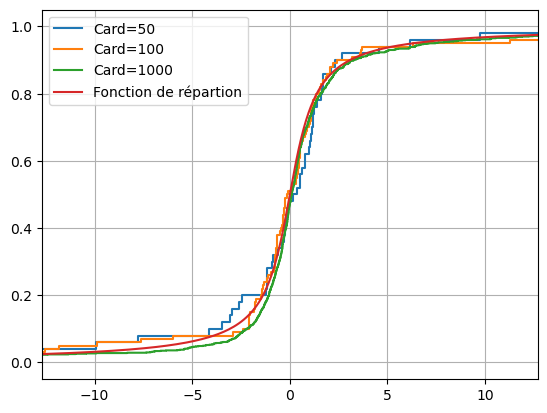

In [29]:
def arct(X):
    return np.arctan(X)/np.pi + 1/2

def inverse_arct(X):
    return np.tan(np.pi * (X - 1/2))

def simuCauchy():
    return inverse_arct(np.random.rand())

m = np.tan(np.pi * 0.475)

for n in [50, 100, 1000]:
    traceFctRepEmpirique01([simuCauchy() for _ in range(n)])

x = np.linspace(-m, m, 200)
plt.plot(x, arct(x), label='Fonction de répartion')
plt.legend()
plt.gca().set_xlim(-m, m)